##Objective
To explore and compare different activation functions used in artificial neural networks
and understand their impact on the output of a neural network.

##Implement and Visualize Activation Functions

1. step function

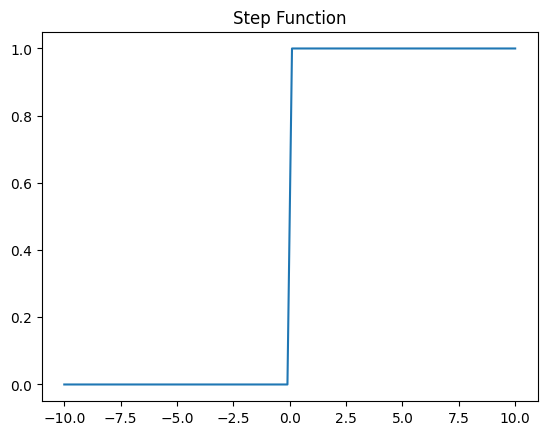

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

x = np.linspace(-10, 10, 100)
y = step_function(x)

plt.plot(x, y)
plt.title("Step Function")
plt.show()

2. Sigmoid function

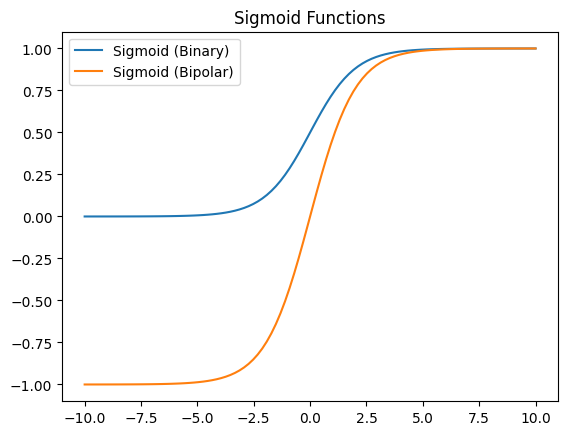

In [2]:
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

x = np.linspace(-10, 10, 100)
y_binary = sigmoid_binary(x)
y_bipolar = sigmoid_bipolar(x)

plt.plot(x, y_binary, label='Sigmoid (Binary)')
plt.plot(x, y_bipolar, label='Sigmoid (Bipolar)')
plt.title("Sigmoid Functions")
plt.legend()
plt.show()

3. Tanh function

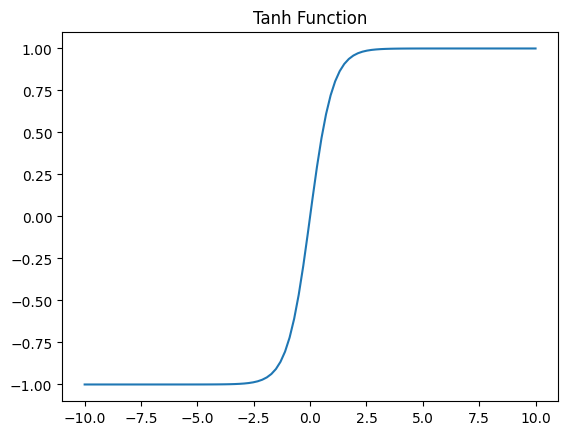

In [3]:
def tanh_function(x):
    return np.tanh(x)

y_tanh = tanh_function(x)

plt.plot(x, y_tanh)
plt.title("Tanh Function")
plt.show()

4. relu function

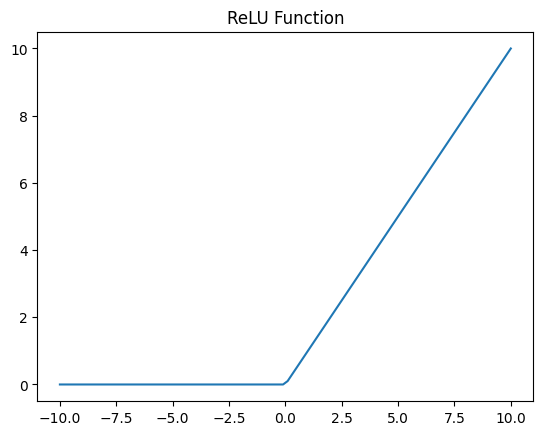

In [4]:
def relu_function(x):
    return np.maximum(0, x)

y_relu = relu_function(x)

plt.plot(x, y_relu)
plt.title("ReLU Function")
plt.show()

## Implement a Simple Neural Network

In [16]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the labels (since it's a multi-class classification problem)
encoder = OneHotEncoder(sparse_output=False)  # Fix for the sparse_output argument
y = encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the function to create the neural network
def create_nn(activation):
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation=activation))  # hidden layer
    model.add(Dense(3, activation='softmax'))  # output layer for 3 classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model with tanh activation
model_tanh = create_nn('tanh')
model_tanh.fit(X_train, y_train, epochs=100, verbose=0)
loss, accuracy = model_tanh.evaluate(X_test, y_test, verbose=0)
print(f"Tanh Activation Test Accuracy: {accuracy:.4f}")

# Train and evaluate the model with ReLU activation
model_relu = create_nn('relu')
model_relu.fit(X_train, y_train, epochs=100, verbose=0)
loss, accuracy = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"ReLU Activation Test Accuracy: {accuracy:.4f}")

# Train and evaluate the model with ReLU activation
model_sigmoid = create_nn('relu')
model_sigmoid.fit(X_train, y_train, epochs=100, verbose=0)
loss, accuracy = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"ReLU Activation Test Accuracy: {accuracy:.4f}")





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tanh Activation Test Accuracy: 0.9667
ReLU Activation Test Accuracy: 0.9333
ReLU Activation Test Accuracy: 0.8333


1. Activation Function Visualization:
 - Step Function: Step Function: A basic function that outputs 1 if input is greater than or equal to 0, and 0 otherwise.
 - Sigmoid Function (Binary and Bipolar): Outputs values between 0 and 1 (binary) or -1 and 1 (bipolar), providing a smooth transition between these values.
 - Tanh Function: Similar to sigmoid but outputs between -1 and 1, often used in hidden layers.
 - ReLU Function: Outputs the input if it's positive and 0 otherwise, becoming increasingly popular due to its computational efficiency.

2. Simple Neural Network Implementation:
 - An XOR dataset is used to train neural networks with different activation functions.
 - The `create_nn` function builds a simple neural network with a hidden layer and an output layer.
 - The activation function of the hidden layer is specified as an argument.

3. Training and Evaluation:
 - The code trains separate neural networks using the sigmoid, ReLU, and tanh activation functions.
 - Each network is trained for 500 epochs using the Adam optimizer and binary cross-entropy loss.
 - After training, the accuracy of each model is evaluated on the XOR dataset.

4. Output Interpretation:
  - The accuracy scores for each model are printed.
  - Typically, ReLU and tanh tend to perform better than sigmoid for problems like XOR.
   - ReLU can help address the vanishing gradient problem in deep neural networks.
   - Tanh can be advantageous when dealing with centered data.


Conclusion

 Based on the outputs, we can say that Tanh has the most accuracy